<a href="https://colab.research.google.com/github/AbdalrahmanAliElnashar/CNN-Projects/blob/main/02-Intel_Image_Classification/intel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdalrahmanelnashar","key":"f2bec9720ff7fca08e17f5c9f67dc36f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d puneet6060/intel-image-classification

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip /content/intel-image-classification.zip

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob
import cv2 
import tensorflow as tf
import keras

# Dataset Directory

In [ ]:
trainDir = '/content/seg_train/seg_train'
testDir = '/content/seg_test/seg_test'
predDir = '/content/seg_pred/seg_pred'

In [ ]:
print(os.listdir(trainDir)) # print folders of train dataset
print(os.listdir(testDir))  # print folders of test dataset

['sea', 'buildings', 'mountain', 'glacier', 'forest', 'street']
['sea', 'buildings', 'mountain', 'glacier', 'forest', 'street']


# Open Folders 

## Train Dataset

In [ ]:
for folder in os.listdir(trainDir):
    folder_path = os.path.join(trainDir, folder)
    images = []
    for file in os.listdir(folder_path):
        images.append(file)
    # print(len(images))

    print(f'For training data, found {len(images)} image in folder {folder}')

For training data, found 2274 image in folder sea
For training data, found 2191 image in folder buildings
For training data, found 2512 image in folder mountain
For training data, found 2404 image in folder glacier
For training data, found 2271 image in folder forest
For training data, found 2382 image in folder street


## Test Dataset

In [ ]:
for folder in os.listdir(testDir):
    folder_path = os.path.join(testDir, folder)
    images = []
    for file in os.listdir(folder_path):
        images.append(file)
    # print(len(images))
    
    print(f'For testing data, found {len(images)} image in folder {folder}')

For testing data, found 510 image in folder sea
For testing data, found 437 image in folder buildings
For testing data, found 525 image in folder mountain
For testing data, found 553 image in folder glacier
For testing data, found 474 image in folder forest
For testing data, found 501 image in folder street


## Predict Dataset

In [ ]:
# No Folders ... just open folder
images = []
for file in os.listdir(predDir):
    images.append(file)
print(f'For Prediction data, found {len(images)} image in Prediction folder')

For Prediction data, found 7301 image in Prediction folder



# Check image size

## Train Dataset

In [ ]:
image_size = []
for folder in os.listdir(trainDir):
        folder_path = os.path.join(trainDir, folder)
        for file in os.listdir(folder_path):
            img = plt.imread(os.path.join(folder_path, file))
            image_size.append(img.shape)
pd.Series(image_size).value_counts()   

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(143, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(142, 150, 3)        2
(123, 150, 3)        2
(136, 150, 3)        2
(144, 150, 3)        2
(120, 150, 3)        1
(76, 150, 3)         1
(105, 150, 3)        1
(149, 150, 3)        1
(110, 150, 3)        1
(97, 150, 3)         1
(133, 150, 3)        1
(119, 150, 3)        1
(103, 150, 3)        1
(102, 150, 3)        1
(145, 150, 3)        1
(141, 150, 3)        1
(147, 150, 3)        1
(100, 150, 3)        1
(81, 150, 3)         1
(131, 150, 3)        1
(124, 150, 3)        1
(140, 150, 3)        1
(115, 150, 3)        1
dtype: int64

## Test Dataset

In [ ]:
image_size = []
for folder in os.listdir(testDir):
        folder_path = os.path.join(testDir, folder)
        for file in os.listdir(folder_path):
            img = plt.imread(os.path.join(folder_path, file))
            image_size.append(img.shape)
pd.Series(image_size).value_counts()   

(150, 150, 3)    2993
(81, 150, 3)        1
(131, 150, 3)       1
(72, 150, 3)        1
(149, 150, 3)       1
(76, 150, 3)        1
(110, 150, 3)       1
(141, 150, 3)       1
dtype: int64

## Predict Dataset

In [ ]:
image_size = []

for file in os.listdir(predDir):
    img = plt.imread(os.path.join(predDir, file))
    image_size.append(img.shape)
pd.Series(image_size).value_counts()   

(150, 150, 3)    7288
(112, 150, 3)       1
(108, 150, 3)       1
(124, 150, 3)       1
(374, 500, 3)       1
(100, 150, 3)       1
(129, 150, 3)       1
(139, 150, 3)       1
(131, 150, 3)       1
(144, 150, 3)       1
(126, 150, 3)       1
(143, 150, 3)       1
(149, 150, 3)       1
(133, 150, 3)       1
dtype: int64


# Reading Images

In [ ]:
SIZE = 100

folders = {'buildings':0 ,
        'forest':1,
        'glacier':2,
        'mountain':3,
        'sea':4,
        'street':5}

## Train Dataset

In [ ]:
import cv2

X_train = []
y_train = []

for folder in os.listdir(trainDir):
    folder_path = os.path.join(trainDir, folder)
    # x = 0 
    for file in os.listdir(folder_path):
        # x += 1
        # 1st thing read the images
        image = cv2.imread(os.path.join(folder_path, file)) # path not file 
        # 2nd thing resize the images
        image_array = cv2.resize(image, (SIZE, SIZE))
        # 3rd thing append image_array to X_train and convert to list
        X_train.append(list(image_array))
        # 4th thing append folder label to y_train
        y_train.append(folders[folder])
        # if x == 10:
            # break

In [ ]:
print(f'we have {len(X_train)} items in X_train')
print(f'we have {len(y_train)} items in X_train')

we have 14034 items in X_train
we have 14034 items in X_train


In [ ]:
print(type(X_train)) # type --> list
print(X_train[0]) # Ask Dr Mohamed Gamal 
print(y_train[0]) 

<class 'list'>
[array([[ 0,  5,  4],
       [ 1,  6,  5],
       [ 1,  6,  5],
       [ 1,  5,  6],
       [ 1,  5,  6],
       [ 0,  3,  4],
       [ 0,  4,  5],
       [ 0,  4,  5],
       [ 0,  4,  5],
       [ 0,  4,  5],
       [ 0,  4,  5],
       [ 1,  5,  6],
       [ 1,  6,  7],
       [ 0,  5,  6],
       [ 0,  4,  5],
       [ 1,  6,  7],
       [ 0,  3,  4],
       [ 0,  4,  5],
       [ 0,  4,  5],
       [ 0,  4,  5],
       [ 1,  5,  6],
       [ 0,  4,  7],
       [ 0,  4,  7],
       [ 1,  6,  9],
       [ 1,  6,  9],
       [ 0,  5,  8],
       [ 0,  5,  8],
       [ 2,  7, 10],
       [ 1,  6,  9],
       [ 1,  6,  9],
       [ 1,  6,  9],
       [ 2,  7, 10],
       [ 2,  5,  9],
       [ 1,  6,  9],
       [ 2,  7, 10],
       [ 2,  6, 11],
       [ 1,  5, 10],
       [ 2,  6, 11],
       [ 2,  6, 11],
       [ 2,  6, 11],
       [ 2,  7, 10],
       [ 2,  7, 10],
       [ 2,  6, 10],
       [ 2,  6, 11],
       [ 2,  6, 11],
       [ 2,  6, 11],
       [ 2,  6, 11

## Test Dataset

In [ ]:
X_test = []
y_test = []

for folder in os.listdir(testDir):
    folder_path = os.path.join(testDir, folder)
    # x = 0 
    for file in os.listdir(folder_path):
        # x += 1
        # 1st thing read the images
        image = cv2.imread(os.path.join(folder_path, file)) # path not file 
        # 2nd thing resize the images
        image_array = cv2.resize(image, (SIZE, SIZE))
        # 3rd thing append image_array to X_train and convert to list
        X_test.append(list(image_array))
        # 4th thing append folder label to y_train
        y_test.append(folders[folder])
        # if x == 10:
            # break


In [ ]:
print(f'we have {len(X_test)} items in X_test')
print(f'we have {len(y_test)} items in y_test')

we have 3000 items in X_test
we have 3000 items in y_test


In [ ]:
print(type(X_test)) # type --> list
print(X_test[0]) # Ask Dr Mohamed Gamal 
print(y_test[0]) 

<class 'list'>
[array([[160,  66,   0],
       [160,  66,   0],
       [160,  66,   0],
       [160,  66,   0],
       [160,  66,   0],
       [159,  65,   0],
       [160,  66,   1],
       [161,  67,   1],
       [159,  65,   0],
       [158,  64,   0],
       [159,  64,   0],
       [160,  63,   0],
       [160,  63,   0],
       [160,  62,   1],
       [160,  62,   2],
       [160,  62,   2],
       [159,  61,   1],
       [160,  62,   2],
       [160,  62,   1],
       [159,  62,   0],
       [160,  63,   0],
       [160,  63,   0],
       [160,  63,   0],
       [160,  63,   0],
       [159,  61,   1],
       [159,  61,   1],
       [158,  60,   0],
       [158,  59,   0],
       [158,  59,   0],
       [158,  59,   0],
       [158,  59,   1],
       [158,  59,   0],
       [158,  60,   0],
       [157,  59,   0],
       [156,  58,   0],
       [156,  57,   0],
       [158,  57,   1],
       [157,  57,   1],
       [157,  56,   1],
       [157,  56,   1],
       [157,  56,   1],


##  Predict Dataset

In [ ]:
x_pred = []

for file in os.listdir(predDir):
    image = cv2.imread(os.path.join(predDir, file))
    image_array = cv2.resize(image, (SIZE, SIZE))
    x_pred.append(list(image_array))

In [ ]:
print(f'we have {len(x_pred)} items in X_Predict')


we have 7301 items in X_Predict



# Visualize Some images

In [ ]:
folders = {
        # 'Key' : value 
        'buildings':0 ,
        'forest':1,
        'glacier':2,
        'mountain':3,
        'sea':4,
        'street':5  
    }

def get_folder_name(x):
    # function to return class name
    for key, value in folders.items():
        if x == value:
            return key

## Train Dataset

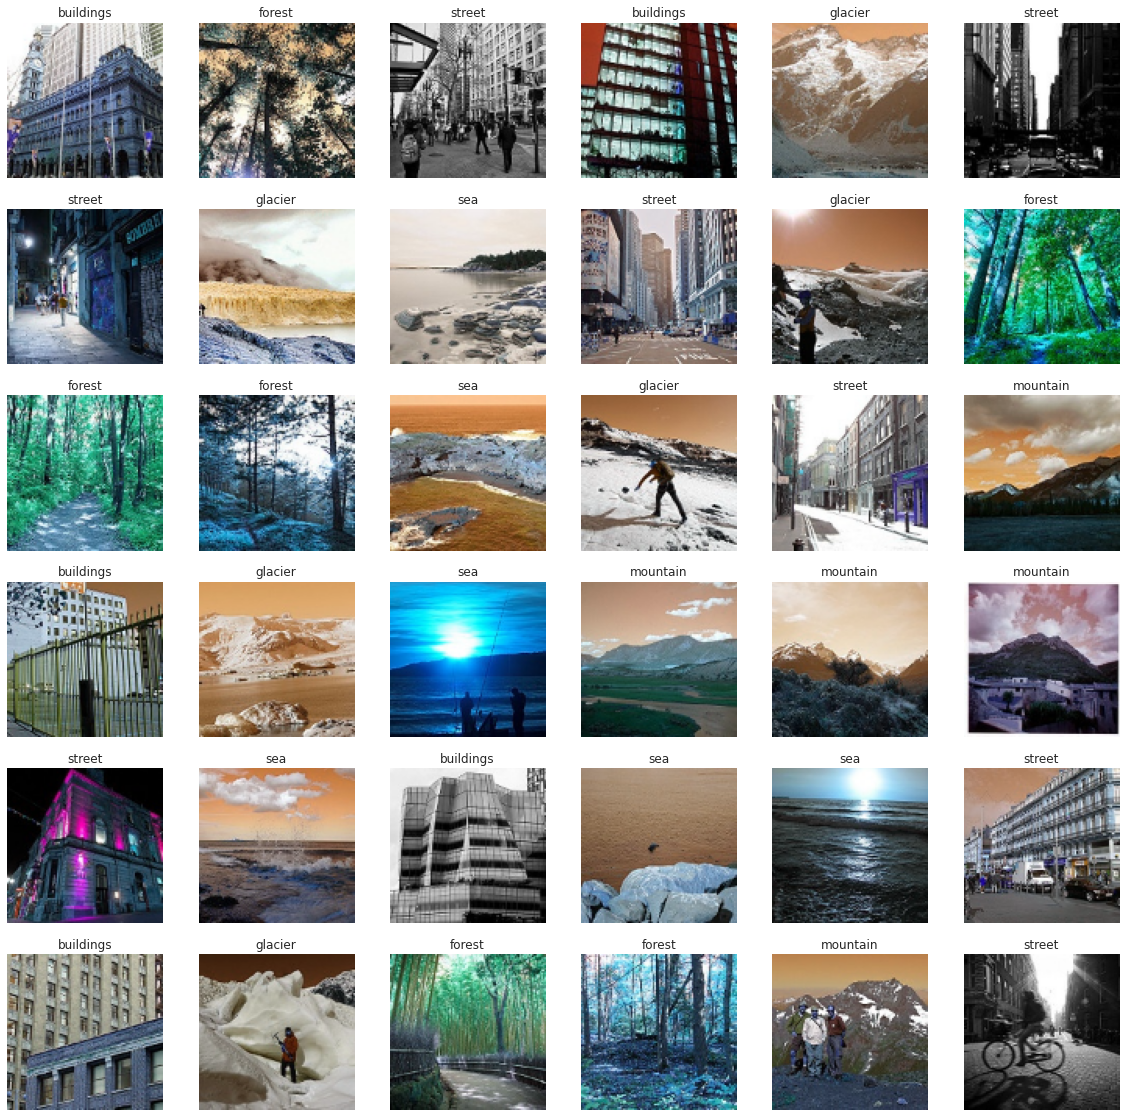

In [ ]:

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(get_folder_name(y_train[i]))

# you want to check this code again 

## Test Dataset

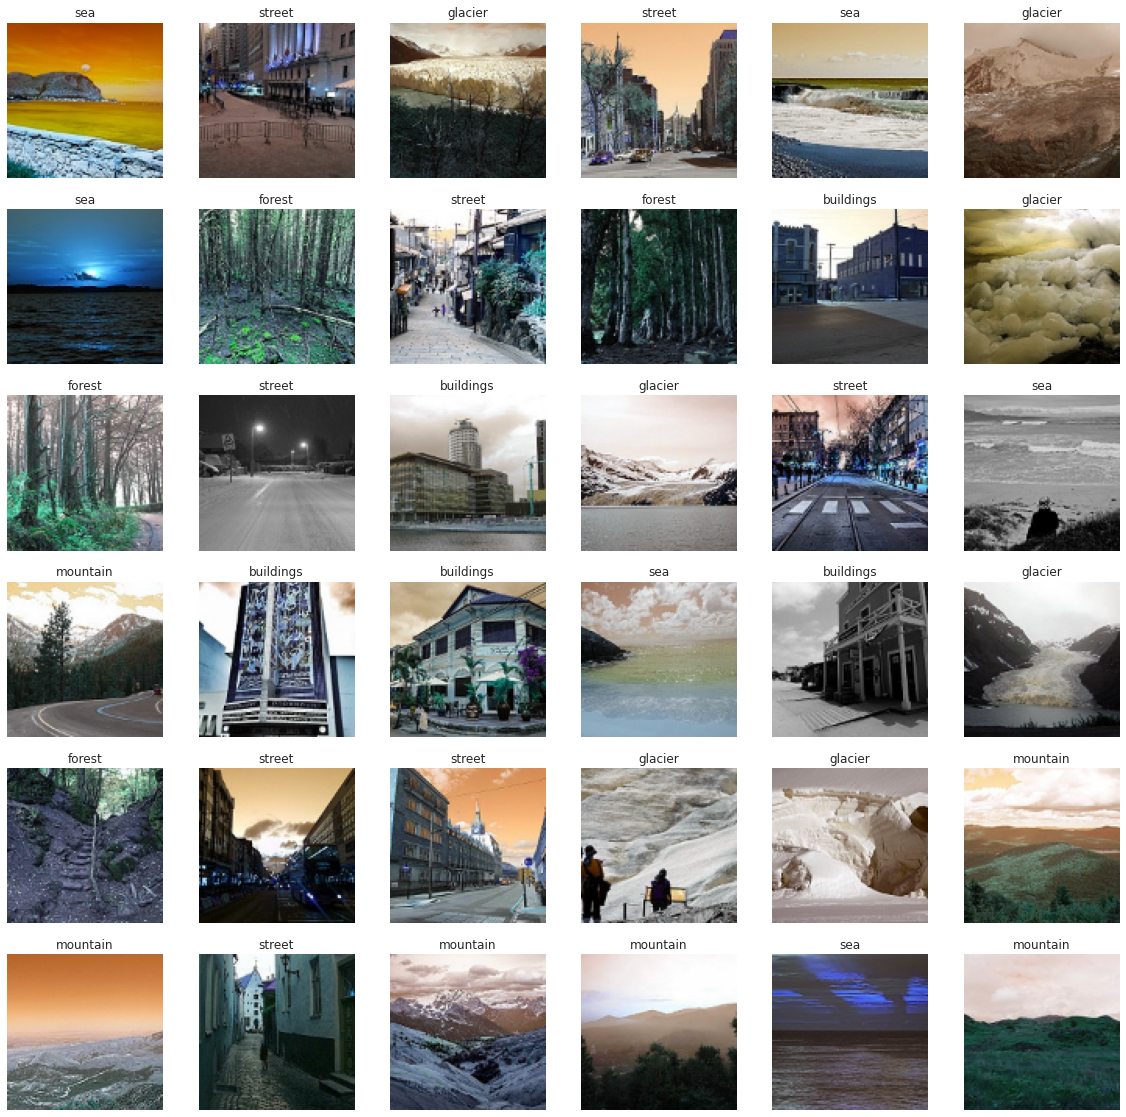

In [ ]:

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(get_folder_name(y_test[i]))

## Predict Dataset

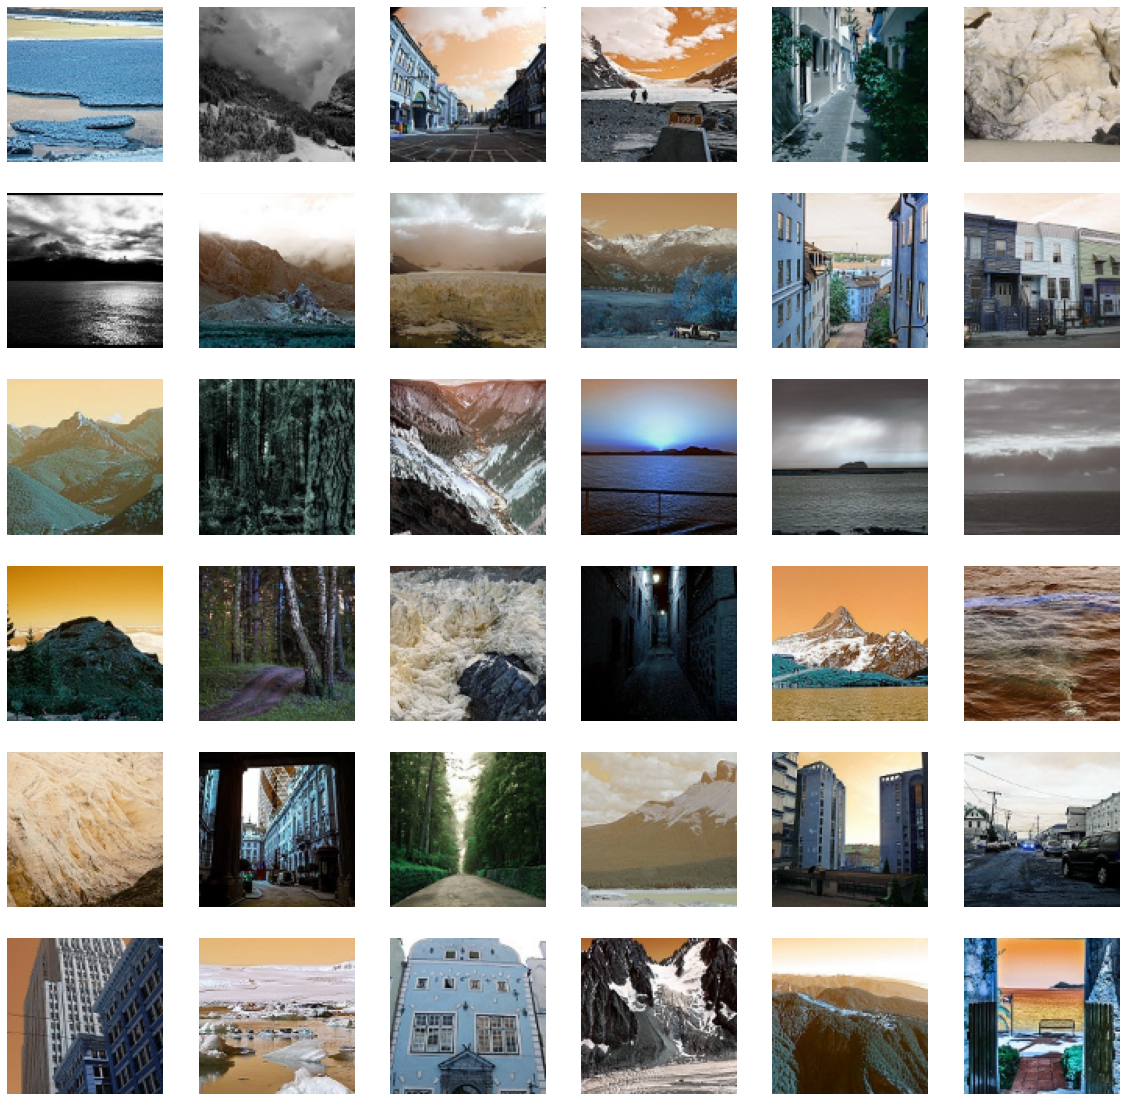

In [ ]:

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_pred[i])   
    plt.axis('off')



# Building the Model

## Convert images list to array

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
x_pred = np.array(x_pred)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(f'X_pred shape  is {x_pred.shape}')

NameError: ignored

In [ ]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(SIZE,SIZE,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

In [ ]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print(KerasModel.summary())

In [ ]:
epochs = 50
model = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

In [ ]:
y_result = KerasModel.predict(x_pred)

print('Prediction Shape is {}'.format(y_result.shape))

In [ ]:

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_pred[i])    
    plt.axis('off')
    plt.title(get_folder_name(np.argmax(y_result[i])))

In [ ]:
from keras.models import  load_model

KerasModel.save(r'/content/Saved Model/First_model.h5')
